<a href="https://colab.research.google.com/github/aliasghar211/FlutterFurnitureAppUI/blob/master/21100187_21100124_MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)

# HomeTeam = ghar Team 
# AwayTeam = Away Team

# (HTHG = Half Time Home Team Goals + HTAG = Half Time Away Team Goals)

# -- OR -- 

# HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)



# FTHG = Full Time Home Team Goals X
# FTAG = Full Time Away Team Goals X

# Match Statistics (where available)
# Attendance = Crowd Attendance
# Referee = Match Referee
# HS = Home Team Shots
# AS = Away Team Shots
# HST = Home Team Shots on Target
# AST = Away Team Shots on Target
# HHW = Home Team Hit Woodwork
# AHW = Away Team Hit Woodwork
# HC = Home Team Corners
# AC = Away Team Corners
# HF = Home Team Fouls Committed
# AF = Away Team Fouls Committed
# HO = Home Team Offsides
# AO = Away Team Offsides


# HY = Home Team Yellow Cards
# AY = Away Team Yellow Cards
# HR = Home Team Red Cards
# AR = Away Team Red Cards

# -- OR --

# HBP = Home Team Bookings Points (10 = yellow, 25 = red)
# ABP = Away Team Bookings Points (10 = yellow, 25 = red)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import os
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [5]:
data_path = '/content/drive/MyDrive/ML_EPL/'
files = os.listdir(data_path)

In [6]:
begun = 0
for fille in files:
  if fille.split('.')[-1] == 'csv':
    if begun == 0: 
      dataset00 = pd.read_csv(data_path + fille)  
      begun = 1
    else:
      dataset00 = dataset00.append(pd.read_csv(data_path + fille),ignore_index=True)

print(len(dataset00))
dataset00.shape

7303


(7303, 162)

In [7]:
dataset00 = dataset00.iloc[:,:23]
dataset00.dropna(axis=0,inplace=True)
dataset00

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,16/08/14,Arsenal,Crystal Palace,2.0,1.0,H,1.0,1.0,D,J Moss,14.0,4.0,6.0,2.0,13.0,19.0,9.0,3.0,2.0,2.0,0.0,1.0
1,E0,16/08/14,Leicester,Everton,2.0,2.0,D,1.0,2.0,A,M Jones,11.0,13.0,3.0,3.0,16.0,10.0,3.0,6.0,1.0,1.0,0.0,0.0
2,E0,16/08/14,Man United,Swansea,1.0,2.0,A,0.0,1.0,A,M Dean,14.0,5.0,5.0,4.0,14.0,20.0,4.0,0.0,2.0,4.0,0.0,0.0
3,E0,16/08/14,QPR,Hull,0.0,1.0,A,0.0,0.0,D,C Pawson,19.0,11.0,6.0,4.0,10.0,10.0,8.0,9.0,1.0,2.0,0.0,0.0
4,E0,16/08/14,Stoke,Aston Villa,0.0,1.0,A,0.0,0.0,D,A Taylor,12.0,7.0,2.0,2.0,14.0,9.0,2.0,8.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,E0,19/05/01,Man City,Chelsea,1.0,2.0,A,1.0,1.0,D,Mike Riley,3.0,9.0,1.0,3.0,22.0,18.0,8.0,7.0,4.0,2.0,0.0,0.0
7299,E0,19/05/01,Middlesbrough,West Ham,2.0,1.0,H,2.0,1.0,H,Paul Durkin,19.0,11.0,7.0,5.0,13.0,15.0,5.0,6.0,0.0,0.0,0.0,0.0
7300,E0,19/05/01,Newcastle,Aston Villa,3.0,0.0,H,2.0,0.0,H,Barry Knight,9.0,5.0,5.0,1.0,10.0,14.0,5.0,1.0,0.0,5.0,1.0,1.0
7301,E0,19/05/01,Southampton,Arsenal,3.0,2.0,H,0.0,1.0,A,Paul Taylor,11.0,8.0,7.0,5.0,17.0,10.0,7.0,5.0,1.0,2.0,0.0,0.0


In [ ]:
team_list = np.array(dataset00['HomeTeam'].append(dataset00['AwayTeam'], ignore_index=True).drop_duplicates(inplace=False))         
referee_list = np.array(dataset00['Referee'].drop_duplicates(inplace=False))                                                        
result_list = np.array(['H','D','A'])                                                                                                       

for i in range(len(dataset00)):                                                                                                             
  dataset00['HomeTeam'].iloc[i] = np.where(team_list == dataset00['HomeTeam'].iloc[i])[0][0]                                              
  dataset00['AwayTeam'].iloc[i] = np.where(team_list == dataset00['AwayTeam'].iloc[i])[0][0]

  dataset00['Referee'].iloc[i] = np.where(referee_list == dataset00['Referee'].iloc[i])[0][0]                                                                   
  dataset00['FTR'].iloc[i] = np.where(result_list == dataset00['FTR'].iloc[i])[0][0]                                                                
  dataset00['HTR'].iloc[i] = np.where(result_list == dataset00['HTR'].iloc[i])[0][0]                                                                        

dataset00.drop(labels=['Div','Date',"FTHG","FTAG","Referee"],axis=1,inplace=True)                                                                                     

dataset00.head()                                                                                                                                              

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,HomeTeam,AwayTeam,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,12,0,1.0,1.0,1,14.0,4.0,6.0,2.0,13.0,19.0,9.0,3.0,2.0,2.0,0.0,1.0
1,1,13,1,1.0,2.0,2,11.0,13.0,3.0,3.0,16.0,10.0,3.0,6.0,1.0,1.0,0.0,0.0
2,2,15,2,0.0,1.0,2,14.0,5.0,5.0,4.0,14.0,20.0,4.0,0.0,2.0,4.0,0.0,0.0
3,3,16,2,0.0,0.0,1,19.0,11.0,6.0,4.0,10.0,10.0,8.0,9.0,1.0,2.0,0.0,0.0
4,4,10,2,0.0,0.0,1,12.0,7.0,2.0,2.0,14.0,9.0,2.0,8.0,0.0,3.0,0.0,0.0


In [ ]:
tbn = ['HTHG','HTAG','HS','AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR']


for t in tbn: #Std normal
  dataset00[t] = (dataset00[t] - dataset00[t].mean()) / dataset00[t].std()

# for t in tbn: #0-1 normal
#   dataset00[t] = (dataset00[t] - dataset00[t].min()) / ((dataset00[t] - dataset00[t].min()).max())

In [ ]:
dataset00.head(5)

,HomeTeam,AwayTeam,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,12,0,0.383799,0.704291,1,0.092082,-1.452136,-0.097828,-1.017396,0.394342,1.742784,0.919799,-0.658561,0.504312,0.184324,-0.252572,3.005262
1,1,13,1,0.383799,2.105922,2,-0.483565,0.545265,-0.990451,-0.664120,1.181651,-0.525116,-1.017931,0.442410,-0.337174,-0.601000,-0.252572,-0.307553
2,2,15,2,-0.821382,0.704291,2,0.092082,-1.230202,-0.395369,-0.310844,0.656778,1.994773,-0.694976,-1.759531,0.504312,1.754973,-0.252572,-0.307553
3,3,16,2,-0.821382,-0.697341,1,1.051495,0.101399,-0.097828,-0.310844,-0.392968,-0.525116,0.596844,1.543381,-0.337174,0.184324,-0.252572,-0.307553
4,4,10,2,-0.821382,-0.697341,1,-0.291683,-0.786335,-1.287992,-1.017396,0.656778,-0.777104,-1.340885,1.176391,-1.178660,0.969649,-0.252572,-0.307553


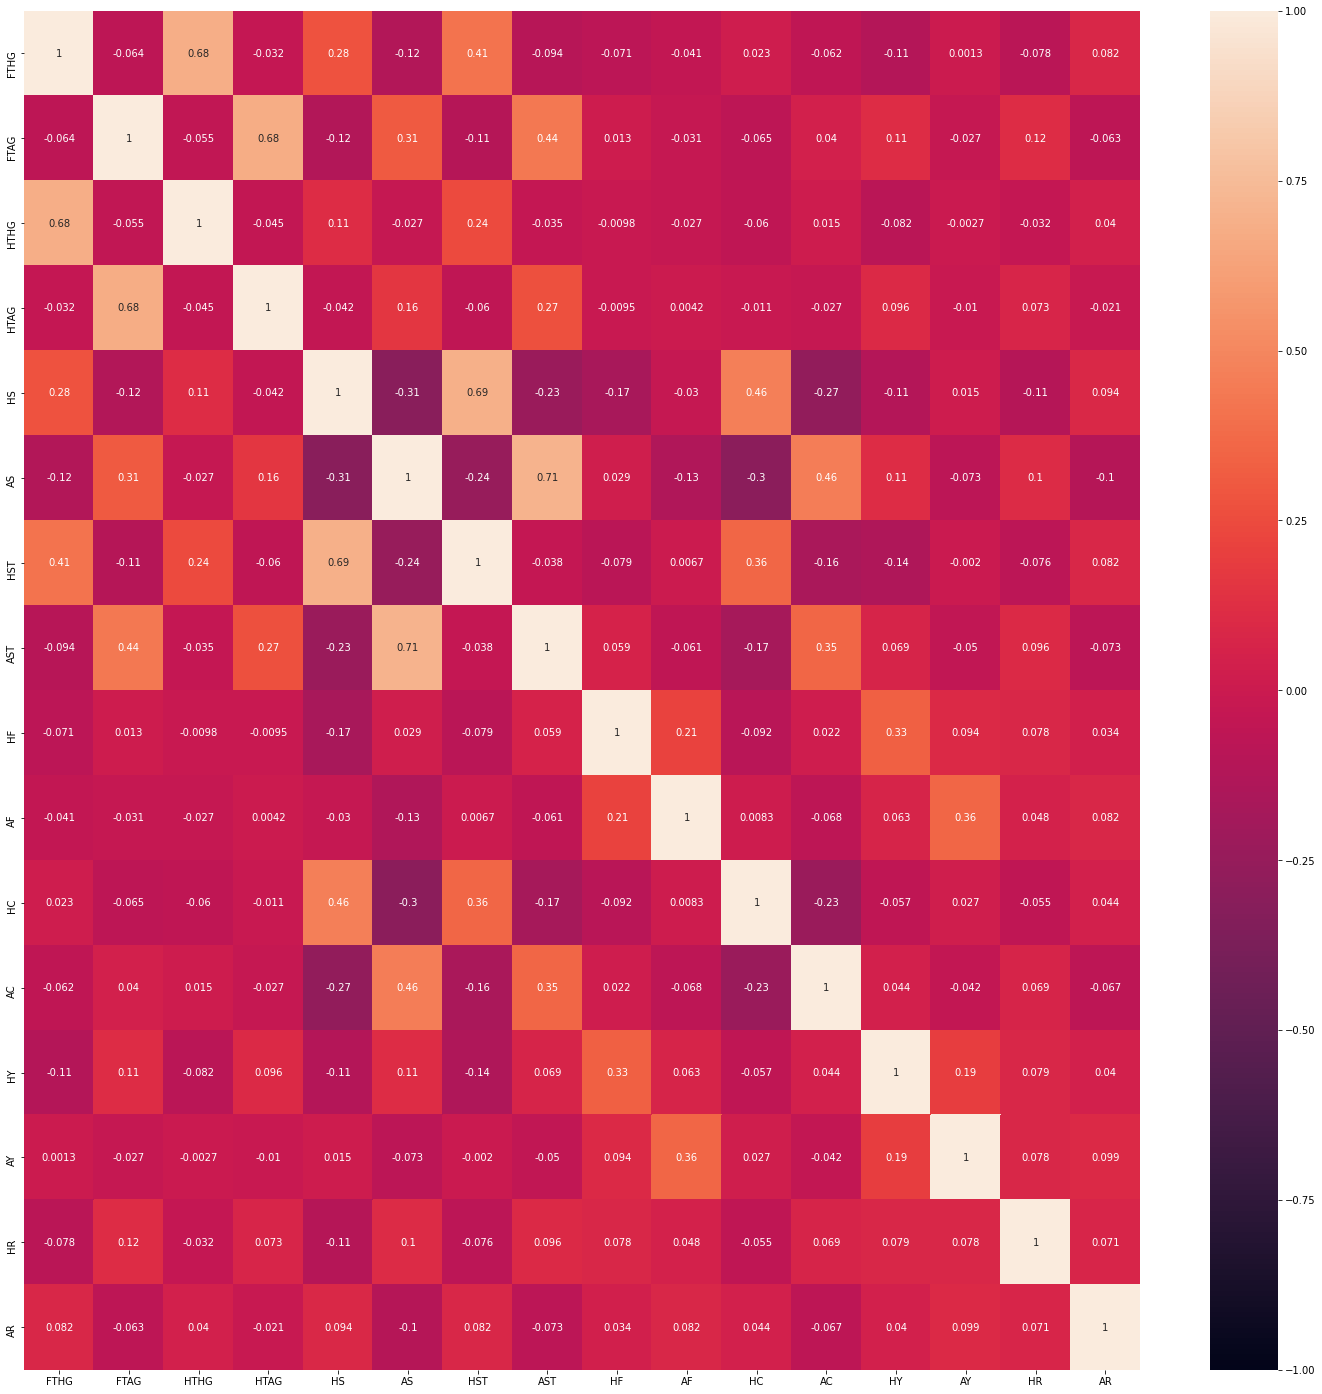

In [8]:
plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(dataset00.corr('pearson'), vmin=-1, vmax=1, annot=True)

In [ ]:
tt_split = 0.9

y_train = dataset00[:int(tt_split * np.shape(dataset00)[0])]['FTR']
y_test  = dataset00[int(tt_split * np.shape(dataset00)[0]):]['FTR']

x_train = dataset00[:int(tt_split * np.shape(dataset00)[0])].drop(labels=['FTR'], axis=1)
x_test  = dataset00[int(tt_split * np.shape(dataset00)[0]):].drop(labels=['FTR'], axis=1)

In [ ]:
val_split = 0.8

y_val  = y_train[int(val_split * np.shape(dataset00)[0]):].reset_index().drop(labels=['index'],axis=1)
y_train = y_train[:int(val_split * np.shape(dataset00)[0])]

x_val  = x_train[int(val_split * np.shape(dataset00)[0]):].reset_index().drop(labels=['index'],axis=1)
x_train = x_train[:int(val_split * np.shape(dataset00)[0])]

In [ ]:
np.shape(x_train), np.shape(y_train), np.shape(x_val), np.shape(y_val)

((5808, 17), (5808,), (726, 17), (726, 1))

In [ ]:
x_train.head(2)

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,12,0.383799,0.704291,1,0.092082,-1.452136,-0.097828,-1.017396,0.394342,1.742784,0.919799,-0.658561,0.504312,0.184324,-0.252572,3.005262
1,1,13,0.383799,2.105922,2,-0.483565,0.545265,-0.990451,-0.664120,1.181651,-0.525116,-1.017931,0.442410,-0.337174,-0.601000,-0.252572,-0.307553


In [ ]:
def evaluate_nayyer(x,y,model):

  points = np.shape(x)[0]
  points_accounted = points
  features = np.shape(x)[1]

  correct_predictions = 0

  for s in range(points):  
    try:
      y_pred = model.predict(np.array(x)[s].astype(np.float).reshape(1,features))[0]
      y_label = np.array(y)[s].astype(np.float)

      if y_pred == y_label:
        correct_predictions += 1


    except:
      points_accounted -= 1

  acc = correct_predictions / points

  return acc, points_accounted/points

In [ ]:
clf = GaussianNB()
clf.fit(np.array(x_train).astype(np.float), np.array(y_train).astype(np.float))

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
evaluate_nayyer(x_val, y_val, clf)

(0.6267217630853994, 1.0)

In [ ]:
evaluate_nayyer(x_test, y_test, clf)

(0.6019283746556474, 1.0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(np.array(x_train).astype(np.float), np.array(y_train).astype(np.float))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
evaluate_nayyer(x_val, y_val, neigh)

(0.5234159779614325, 1.0)

In [ ]:
evaluate_nayyer(x_test, y_test, neigh)

(0.5179063360881543, 1.0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logi = LogisticRegression(random_state=0,max_iter=1000)
logi.fit(np.array(x_train).astype(np.float), np.array(y_train).astype(np.float))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_nayyer(x_val,y_val,logi)

(0.6336088154269972, 1.0)

In [ ]:
evaluate_nayyer(x_test,y_test,logi)

(0.6170798898071626, 1.0)